In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')




In [30]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.00,0,1,0,25.19,6.60,140,0
1,1,20.00,0,0,0,27.32,6.60,85,0
2,1,44.00,0,0,0,19.31,6.50,200,1
3,1,32.00,0,0,0,27.32,5.00,100,0
4,1,53.00,0,0,0,27.32,6.10,85,0
...,...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220,1
44374,0,43.00,0,0,1,31.35,3.50,100,0
44375,0,44.00,0,0,1,27.32,5.00,158,0
44376,0,13.00,0,0,1,21.81,4.80,90,0


In [5]:
duplicate_rows_data = df[df.duplicated()] 

print('duplicated numbrer of rows',duplicate_rows_data.shape)

duplicated numbrer of rows (786, 9)


In [6]:
df= df.drop_duplicates()

In [7]:
#loop on each column and print distinct value count

for column in df.columns:
    num_distinct_values= len(df[column].unique())
    print(f"{column}:{num_distinct_values}distinct values")

gender:2distinct values
age:101distinct values
hypertension:2distinct values
heart_disease:2distinct values
smoking:2distinct values
bmi:3700distinct values
HbA1c_level:18distinct values
blood_glucose_level:18distinct values
diabetes:2distinct values


In [8]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking                0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


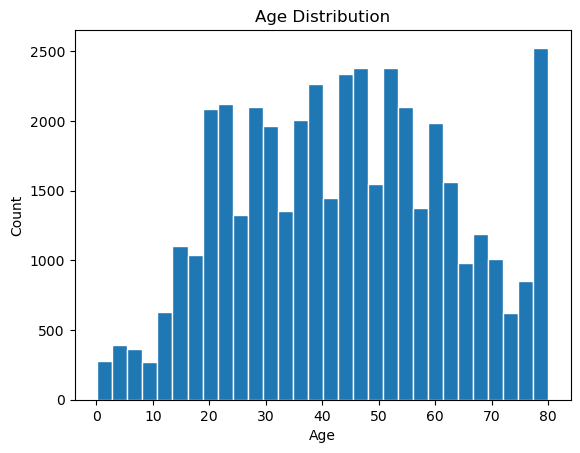

In [9]:
#histogram for age

plt.hist(df['age'],bins=30,edgecolor='white')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

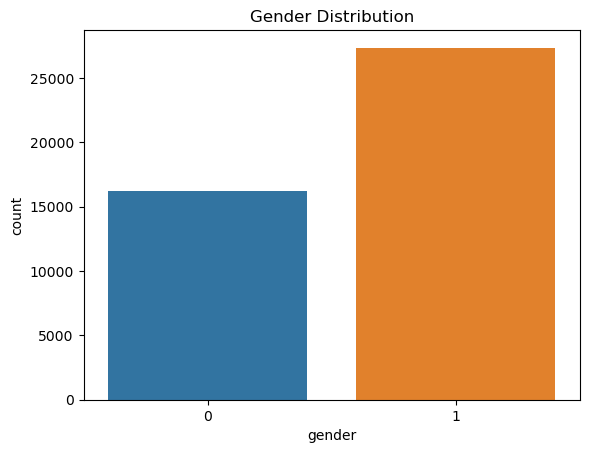

In [10]:
sns.countplot(x='gender',data=df)
plt.title('Gender Distribution')
plt.show()

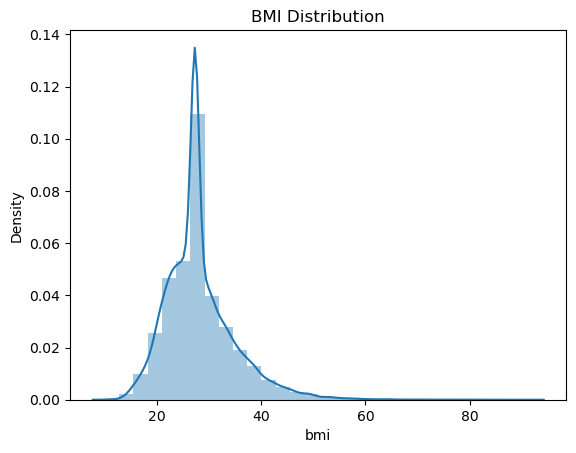

In [11]:
sns.distplot(df['bmi'],bins=30)
plt.title('BMI Distribution')
plt.show()

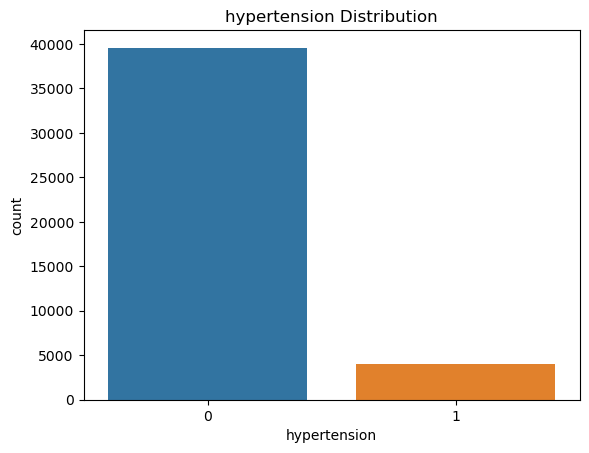

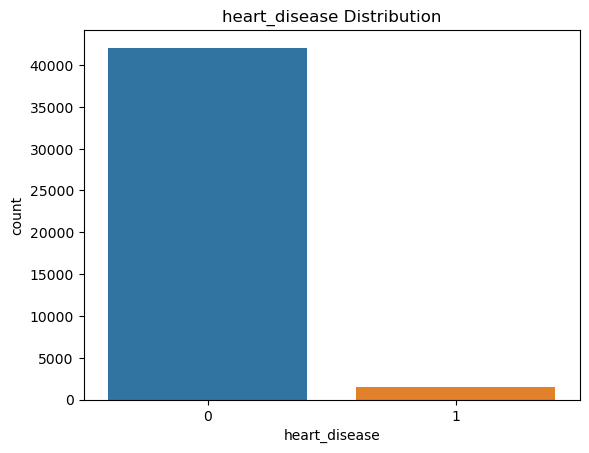

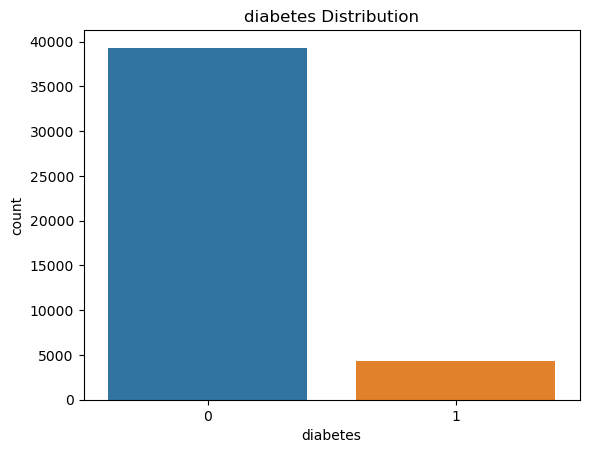

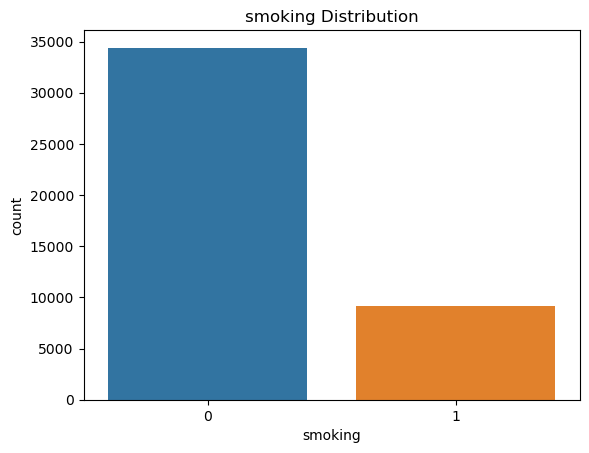

In [12]:
for col in ['hypertension','heart_disease','diabetes','smoking']:
    sns.countplot(x=col,data=df)
    plt.title(f'{col} Distribution')
    plt.show()

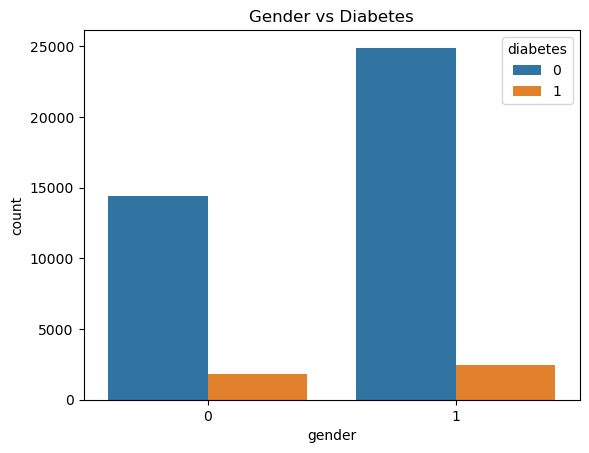

In [13]:
sns.countplot(x='gender',hue='diabetes',data=df)
plt.title("Gender vs Diabetes")
plt.show()

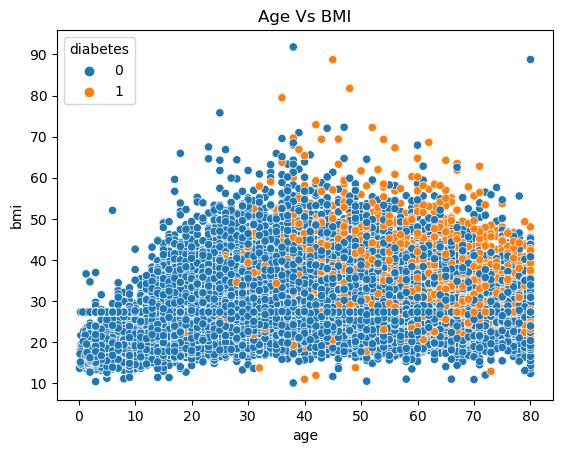

In [14]:
#scatter plot Age vs BMI

sns.scatterplot(x='age',y='bmi', hue='diabetes',data=df)
plt.title("Age Vs BMI")
plt.show()

In [15]:
#split the data into features and target variables

x=df.drop('diabetes',axis=1)
y=df['diabetes']

In [16]:
x

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level
0,1,80.00,0,1,0,25.19,6.60,140
1,1,20.00,0,0,0,27.32,6.60,85
2,1,44.00,0,0,0,19.31,6.50,200
3,1,32.00,0,0,0,27.32,5.00,100
4,1,53.00,0,0,0,27.32,6.10,85
...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220
44374,0,43.00,0,0,1,31.35,3.50,100
44375,0,44.00,0,0,1,27.32,5.00,158
44376,0,13.00,0,0,1,21.81,4.80,90


In [17]:
y

0        0
1        0
2        1
3        0
4        0
        ..
44373    1
44374    0
44375    0
44376    0
44377    0
Name: diabetes, Length: 43592, dtype: int64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [19]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [20]:
rfc_train=rfc.predict(x_train)
print('accuracy score of training data=',accuracy_score(rfc_train,y_train))

accuracy score of training data= 0.9993978149284547


In [21]:
Prediction=rfc.predict(x_test)
print('accuracy score of testing data=',accuracy_score(Prediction,y_test))

accuracy score of testing data= 0.9667393049661659


In [22]:
print(confusion_matrix(Prediction,y_test))

[[7836  257]
 [  33  593]]


In [23]:
print(classification_report(Prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8093
           1       0.70      0.95      0.80       626

    accuracy                           0.97      8719
   macro avg       0.85      0.96      0.89      8719
weighted avg       0.97      0.97      0.97      8719



In [24]:
x

,gender,age,hypertension,heart_disease,smoking,bmi,HbA1c_level,blood_glucose_level
0,1,80.00,0,1,0,25.19,6.60,140
1,1,20.00,0,0,0,27.32,6.60,85
2,1,44.00,0,0,0,19.31,6.50,200
3,1,32.00,0,0,0,27.32,5.00,100
4,1,53.00,0,0,0,27.32,6.10,85
...,...,...,...,...,...,...,...,...
44373,0,67.00,0,0,1,27.32,6.80,220
44374,0,43.00,0,0,1,31.35,3.50,100
44375,0,44.00,0,0,1,27.32,5.00,158
44376,0,13.00,0,0,1,21.81,4.80,90


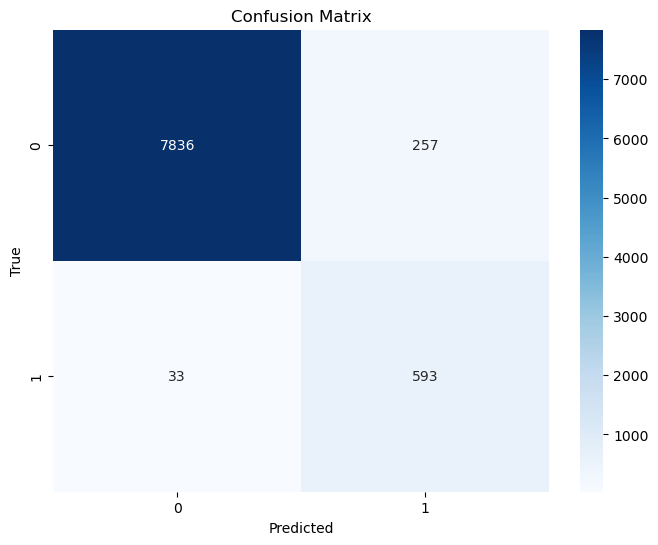

In [26]:
cm=confusion_matrix(Prediction,y_test)

plt.figure(figsize=(8,6))

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')

plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [27]:
##saving model

import pickle

In [28]:
saved_model = pickle.dumps(rfc)

rfc_from_pickle = pickle.loads(saved_model)

In [31]:

rfc_from_pickle.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# 3,	1	,32.00	,0	,0	,0,	27.32,	5.00,	100

In [36]:
rfc_from_pickle.predict([[1,	80,	0,	0	,0,	20.16,	6.5,	130
]])

array([0], dtype=int64)